In [2]:
!pip install yfinance pandas matplotlib numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [21]:
TICKER = 'AAPL'
START = '2018-01-01'
END = None
         # Leave None for today

print(f"Analyzing {TICKER} from {START} to {END or 'today'}")

Analyzing AAPL from 2018-01-01 to today


In [22]:
df = yf.download(TICKER, start=START, end=END, progress=False)
df = df.dropna()
print(f"Downloaded {len(df)} rows of data.")
df.head()


C:\Users\devah\AppData\Local\Temp\ipykernel_10000\2165045671.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START, end=END, progress=False)


Downloaded 1930 rows of data.


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.380985,40.390364,39.677729,39.888708,102223600
2018-01-03,40.373966,40.917820,40.310676,40.444293,118071600
2018-01-04,40.561501,40.664645,40.338803,40.446634,89738400
2018-01-05,41.023308,41.110042,40.566192,40.657615,94640000
2018-01-08,40.870930,41.166296,40.772471,40.870930,82271200


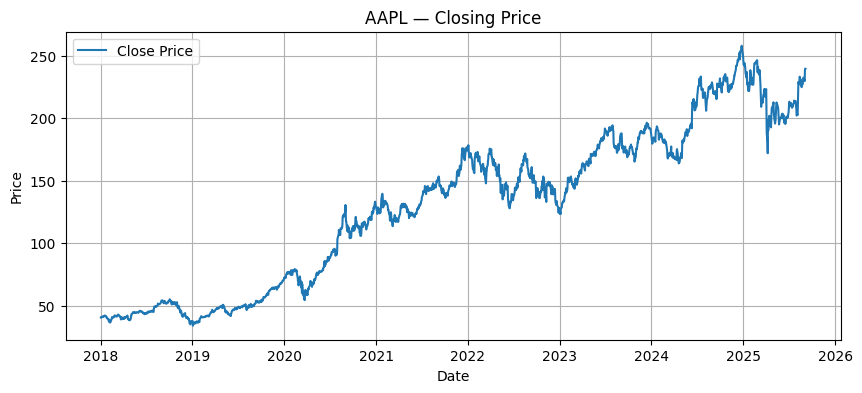

In [28]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title(f"{TICKER} — Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig("closing_price.png", dpi=150)
plt.show()


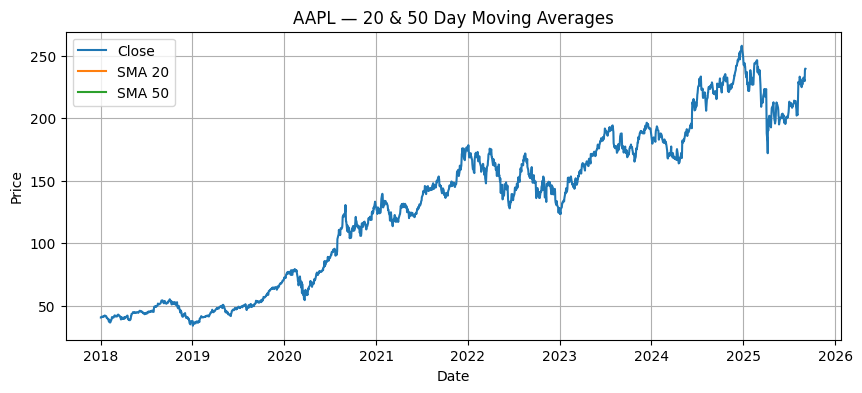

In [29]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10,4))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['SMA_20'], label='SMA 20')
plt.plot(df.index, df['SMA_50'], label='SMA 50')
plt.title(f"{TICKER} — 20 & 50 Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig("day_moving_averages.png", dpi=150)
plt.show()


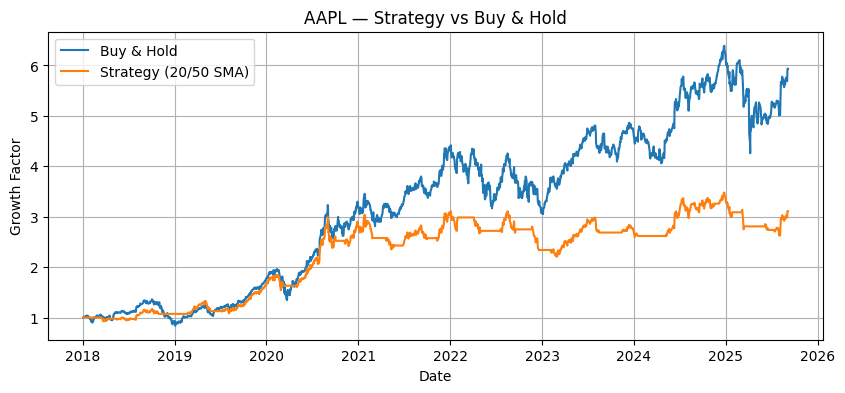

In [26]:
df['Position'] = (df['SMA_20'] > df['SMA_50']).astype(int)
df['Strategy_Return'] = df['Position'].shift(1) * df['Daily_Return']
df['Strategy_Cumulative'] = (1 + df['Strategy_Return']).cumprod()

plt.figure(figsize=(10,4))
plt.plot(df.index, df['Cumulative_Return'], label='Buy & Hold')
plt.plot(df.index, df['Strategy_Cumulative'], label='Strategy (20/50 SMA)')
plt.title(f"{TICKER} — Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Growth Factor")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
df.to_csv(f"{TICKER}_analysis.csv")
print("Saved your analysis as CSV file.")


Saved your analysis as CSV file.
